# Libraries and Functions

The following cell contains the libraries and functions required to make this example implementation work.

**Libraries**
|Library|Required|
|---|---|
|matplotlib|NO|
|CosineCentroids|YES|
|random|NO|

**Functions**
|Functions|Required|
|---|---|
|Generate_Random_Vectors|NO|
|Generate_Random_Color|NO|

In [1]:
# Install packages
%pip install -U ipykernel matplotlib

# Import libraries
from matplotlib import pyplot as plt # Import matplotlib for visualization
from N_Centroids import N_Centroids # Import the N-Centroids model
from random import choice, randint # Used for this example, but not required

# Functions
def Generate_Random_Vectors(vectorCount: int, dimensionCount: int = 2, minValue: int = -10, maxValue: int = 10) -> list[list[int]]:
    """
    Generate a matrix of vectors with random values.

    Parameters:
        vectorCount (int): The number of vectors to generate.
        dimensionCount (int): The number of dimensions in each vector. Defaults to 2.
        minValue (int): The minimum random value. Defaults to -10.
        maxValue (int): The maximum random value. Defaults to 10.

    Returns:
        list[list[int]]: A matrix of vectors with random values.
    """

    matrix: list[list[int]] = []

    for i in range(vectorCount):
        vector: list[int] = []

        for j in range(dimensionCount):
            vector.append(randint(minValue, maxValue))

        matrix.append(vector)

    return matrix

def Generate_Random_Color() -> str:
    """
    Generate a random color.

    Returns:
        str: A random color.
    """
    characters = '0123456789ABCDEF'

    return '#' + ''.join([choice(characters) for _ in range(6)])

Note: you may need to restart the kernel to use updated packages.


In [43]:
matrix: list[list[float]] = []
categories: dict[int, list] = {
    0: [], 1: [], 2: []
}
with open('DataSet.csv', 'r') as f:
    for line in f.readlines()[1:500]:
        rawVector = line.split(',')[1:]
        vector = [float(i) for i in rawVector[:-1]]
        categories[vector[-1]].append(vector[:-1])
        matrix.append(vector)

for vector in matrix[:5]:
    print(vector)
for category, vectors in categories.items():
    print(f"Category {category}: {vectors}")

def Copy(matrix: list[list[float]]) -> list[list[float]]:
    return [vector.copy() for vector in matrix]

[0.0, 0.0, 67.0, 2.0, 124670.0, 1.0]
[1.0, 1.0, 22.0, 1.0, 150773.0, 1.0]
[0.0, 0.0, 49.0, 1.0, 89210.0, 0.0]
[0.0, 0.0, 45.0, 1.0, 171565.0, 1.0]
[0.0, 0.0, 53.0, 1.0, 149031.0, 1.0]
Category 0: [[0.0, 0.0, 49.0, 1.0, 89210.0], [0.0, 0.0, 35.0, 1.0, 144848.0], [0.0, 1.0, 61.0, 2.0, 151591.0], [0.0, 0.0, 60.0, 2.0, 89374.0], [1.0, 1.0, 32.0, 1.0, 88428.0], [0.0, 0.0, 48.0, 1.0, 89804.0], [0.0, 0.0, 36.0, 1.0, 71909.0], [0.0, 1.0, 39.0, 1.0, 68264.0], [0.0, 0.0, 57.0, 2.0, 87605.0], [0.0, 0.0, 25.0, 0.0, 104505.0], [0.0, 0.0, 44.0, 1.0, 133658.0], [1.0, 1.0, 58.0, 2.0, 142335.0], [1.0, 1.0, 23.0, 1.0, 65421.0], [0.0, 0.0, 39.0, 1.0, 130500.0], [0.0, 0.0, 29.0, 0.0, 84531.0], [0.0, 0.0, 26.0, 0.0, 58258.0], [1.0, 1.0, 23.0, 1.0, 115240.0], [0.0, 0.0, 46.0, 1.0, 73703.0], [1.0, 1.0, 41.0, 2.0, 135959.0], [0.0, 0.0, 39.0, 1.0, 151697.0], [1.0, 1.0, 24.0, 1.0, 84792.0], [1.0, 1.0, 58.0, 2.0, 100210.0], [0.0, 0.0, 52.0, 1.0, 93706.0], [1.0, 1.0, 33.0, 1.0, 71070.0], [0.0, 1.0, 41.0, 1.0, 933

cosine clustering epochs: 17
distance clustering epochs: 6
cosine clustering epochs: 33
distance clustering epochs: 39


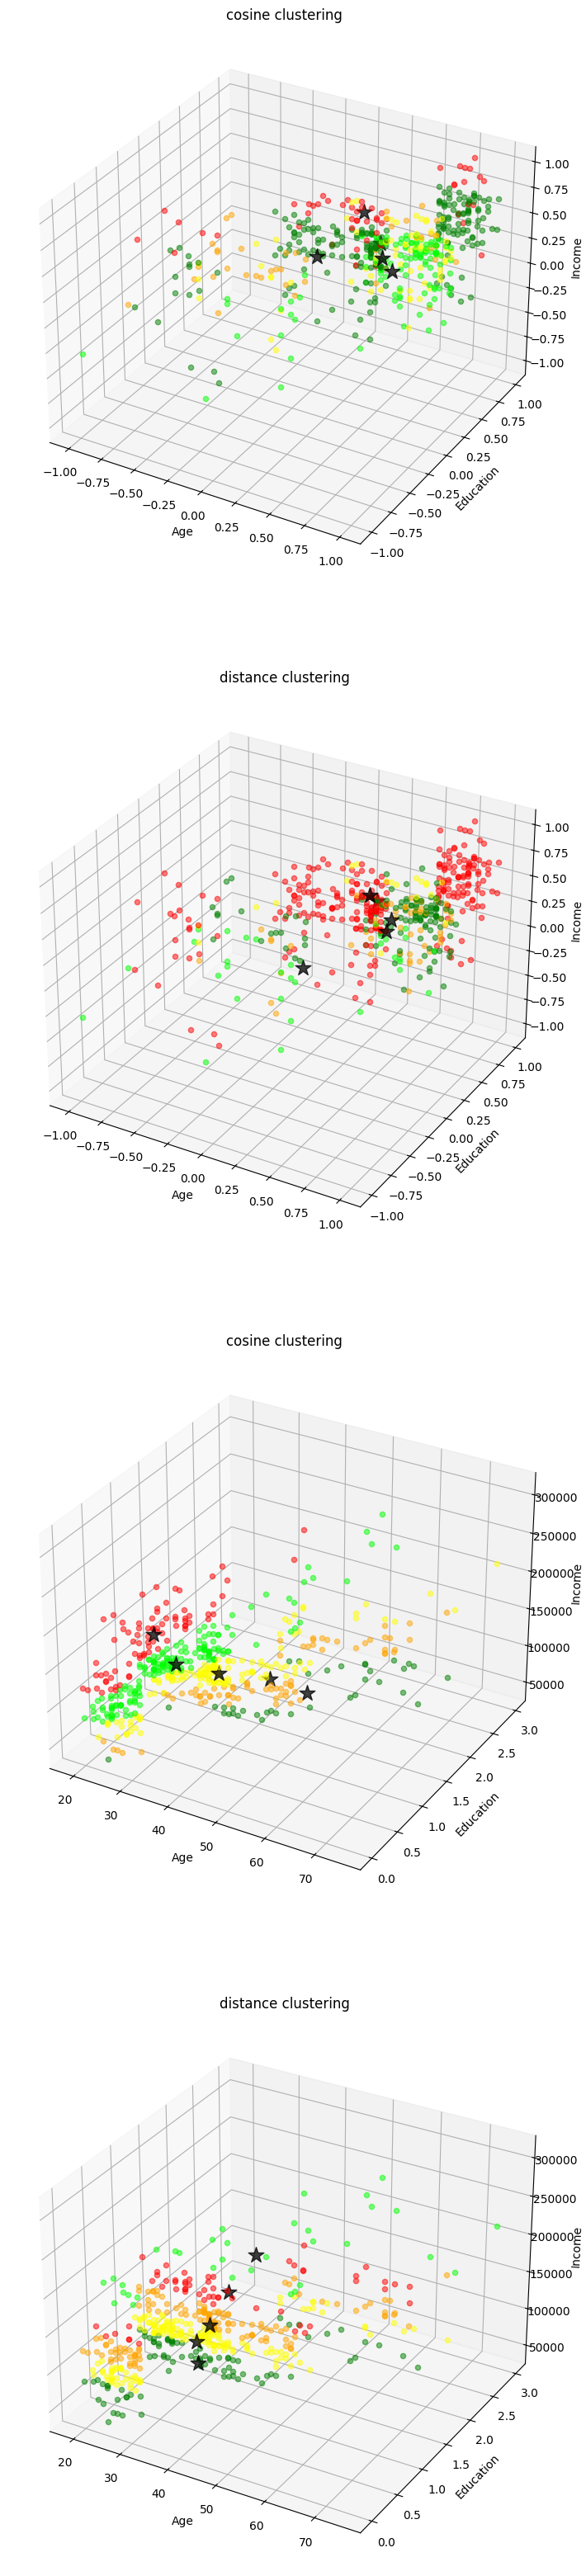

In [45]:
def Draw_Clusters(model: N_Centroids, axis: plt.Axes) -> None:
    print(f"{model.strategy} clustering epochs: {model.Train()}")
    axis.set_title(f"{model.strategy} clustering")
    axis.set_xlabel('Age')
    axis.set_ylabel('Education')
    axis.set_zlabel('Income')

    for cIndex, cluster in enumerate(model.clusters):
        clusterColor: str = colors[cIndex]
        # Plot Vectors
        for vector in cluster.vectors:
            axis.scatter(vector[2], vector[3], vector[4], color=clusterColor, alpha=0.5)
        # Plot Centroid
        axis.scatter(cluster.centroid[2], cluster.centroid[3], cluster.centroid[4], color='black', marker='*', alpha=.75, s=200)

# Initialize the models
groups = 5
models = [
    N_Centroids(
        trainingMatrix=Copy(matrix),
        nGroups=groups,
        strategy="cosine"
    ),
    N_Centroids(
        trainingMatrix=Copy(matrix),
        nGroups=groups,
        strategy="distance"
    ),
    N_Centroids(
        trainingMatrix=Copy(matrix),
        nGroups=groups,
        strategy="cosine"
    ),
    N_Centroids(
        trainingMatrix=Copy(matrix),
        nGroups=groups,
        strategy="distance"
    )
]
models[0].Normalize(negative=True)
models[1].Normalize(negative=True)

colors = ['red', 'orange', 'yellow', 'green', 'lime', 'cyan', 'blue', 'purple', 'magenta']

# Prepare for visualization
figure = plt.figure(figsize=(20, 40))
grid = figure.add_gridspec(4, 1)
axises = grid.subplots(subplot_kw={'projection': '3d'})

for axis, model in zip(axises, models):
    Draw_Clusters(model, axis)

plt.show()